# HOMEWORK: k-Nearest Neighbors

In [74]:
import os

import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 100)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 100)

from sklearn import preprocessing, neighbors, grid_search, cross_validation
from sklearn import model_selection

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [75]:
df = pd.read_csv('/Users/averyw/Desktop/GA/DS-SF-32/lessons/lesson-8/dataset-boston.csv')

In [76]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


The Boston dataset concerns itself with housing values in suburbs of Boston.  A description of the dataset is as follows:

- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sqft
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River binary/dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate (per ten thousands of dollars)
- PTRATIO: pupil-teacher ratio by town
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT: % lower status of the population
- MEDV: Median value of owner-occupied homes (in thousands of dollars)

## Question 1.  
+ Let's first categorize `MEDV` to 4 groups: Bottom 20% as Level 1, next 30% as Level 2, next 30% categorized as Level 3, and the top 20% as Level 4.  
+ Please create a new variable `MEDV_Category` that stores the level number
+ Remember the quantile function
+ Remember how to segment your pandas data frame

In [77]:
# TODO

df['MEDV_Category'] = 0.0
#np.linspace(0,1,10)
df['MEDV_Category'] = pd.qcut(df['MEDV'],10,labels= False)/10.0
df['MEDV_Category'] = np.where(df['MEDV_Category'] <= .2,'Level_1',np.where(df['MEDV_Category'] <= .5,'Level_2',np.where(df['MEDV_Category'] <= .8,'Level_3','Level_4')))
print df['MEDV_Category']
    

0      Level_3
1      Level_2
2      Level_3
3      Level_3
4      Level_4
5      Level_3
6      Level_3
7      Level_3
8      Level_1
9      Level_2
10     Level_1
11     Level_2
12     Level_2
13     Level_2
14     Level_1
15     Level_2
16     Level_3
17     Level_1
18     Level_2
19     Level_1
20     Level_1
21     Level_2
22     Level_1
23     Level_1
24     Level_1
25     Level_1
26     Level_1
27     Level_1
28     Level_2
29     Level_2
30     Level_1
31     Level_1
32     Level_1
33     Level_1
34     Level_1
35     Level_2
36     Level_2
37     Level_2
38     Level_3
39     Level_3
40     Level_4
41     Level_3
42     Level_3
43     Level_3
44     Level_2
45     Level_2
46     Level_2
47     Level_1
48     Level_1
49     Level_2
        ...   
456    Level_1
457    Level_1
458    Level_1
459    Level_2
460    Level_1
461    Level_1
462    Level_2
463    Level_2
464    Level_2
465    Level_2
466    Level_2
467    Level_2
468    Level_2
469    Level_2
470    Level_2
471    Lev

### Our goal is to predict `MEDV_Category` based on `RM`, `PTRATIO`, and `LSTAT`

## Question 2.  

+ First normalize `RM`, `PTRATIO`, and `LSTAT`.  
+ By normalizing, we mean to scale each variable between 0 and 1 with the lowest value as 0 and the highest value as 1

+ Check out the documentation for MinMaxScaler()

In [78]:
# TODO


a = df[['RM','PTRATIO','LSTAT']]
df[['RM','PTRATIO','LSTAT']] =  preprocessing.MinMaxScaler().fit_transform(a)
df[['RM','PTRATIO','LSTAT']]

,RM,PTRATIO,LSTAT
0,0.577505,0.287234,0.089680
1,0.547998,0.553191,0.204470
2,0.694386,0.553191,0.063466
3,0.658555,0.648936,0.033389
4,0.687105,0.648936,0.099338
5,0.549722,0.648936,0.096026
6,0.469630,0.276596,0.295254
7,0.500287,0.276596,0.480684
8,0.396628,0.276596,0.778146
9,0.468097,0.276596,0.424117


## Question 3.  

+ Run a k-NN classifier with 5 nearest neighbors and report your misclassification error; set weights to uniform
+ Calculate your misclassification error on the training set

In [79]:
# TODO

x = df[['RM', 'PTRATIO','LSTAT']]
y = df['MEDV_Category']

knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(x,y)
#print knn.score(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [81]:
from sklearn.metrics import accuracy_score

knn.predict(x)
y
misc_error = 1- accuracy_score(knn.predict(x),y)

print misc_error

0.211462450593


## Question 4. 
+ Is this error reliable? 
+ What could we do to make it better?

Answer: No its not. 

First of all I am testing on the same data I am tarining on. 
We could use cross-validation to make it better. Second of all, just using one k-fold is not wise.

## Question 5.  
+ Now use 10-fold cross-validation to choose the most efficient `k`

In [82]:
# TODO

from sklearn import model_selection
k = range(1,100)
params = {'n_neighbors':k,'weights':['uniform','distance']}

kf = cross_validation.KFold(len(x), n_folds = 10)
gs = grid_search.GridSearchCV(
    estimator=neighbors.KNeighborsClassifier(),
    param_grid=params,
    cv=kf,
)
gs.fit(x,y)
gs.grid_scores_

[mean: 0.62451, std: 0.10655, params: {'n_neighbors': 1, 'weights': 'uniform'},
 mean: 0.62451, std: 0.10655, params: {'n_neighbors': 1, 'weights': 'distance'},
 mean: 0.62846, std: 0.11088, params: {'n_neighbors': 2, 'weights': 'uniform'},
 mean: 0.62451, std: 0.10655, params: {'n_neighbors': 2, 'weights': 'distance'},
 mean: 0.64032, std: 0.09467, params: {'n_neighbors': 3, 'weights': 'uniform'},
 mean: 0.63241, std: 0.10256, params: {'n_neighbors': 3, 'weights': 'distance'},
 mean: 0.66601, std: 0.08208, params: {'n_neighbors': 4, 'weights': 'uniform'},
 mean: 0.65810, std: 0.08393, params: {'n_neighbors': 4, 'weights': 'distance'},
 mean: 0.68182, std: 0.09279, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.65613, std: 0.10061, params: {'n_neighbors': 5, 'weights': 'distance'},
 mean: 0.70158, std: 0.08583, params: {'n_neighbors': 6, 'weights': 'uniform'},
 mean: 0.68577, std: 0.09831, params: {'n_neighbors': 6, 'weights': 'distance'},
 mean: 0.71146, std: 0.08819, para

In [83]:
gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=16, p=2,
           weights='uniform')

## Question 6.  

+ Explain your findings
+ What were your best parameters?
+ What was the best k?
+ What was the best model?

The best K was 16.
HTHe best model used minkowski, leaf size 30, n_neighbords, with uniform weights. 

## Question 7.  

+ Train your model with the optimal `k` you found above 
+ (don't worry if it changes from time to time - if that is the case use the one that is usually the best)

In [84]:
# TODO

Best_Model = gs.best_estimator_
Best_Model_Predictions = Best_Model.predict(x)

In [88]:
from sklearn import metrics
classification_report = metrics.classification_report(y_true= y,y_pred=Best_Model_Predictions)

In [86]:
import matplotlib.pyplot as plt
import numpy as np

def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: http://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    from itertools import izip
    pc.update_scalarmappable()
    ax = pc.get_axes()
    for p, color, value in izip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)


def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: http://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):
    '''
    Inspired by:
    - http://stackoverflow.com/a/16124677/395857 
    - http://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()    
    #c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    #fig.set_size_inches(cm2inch(40, 20))
    #fig.set_size_inches(cm2inch(40*4, 20*4))
    fig.set_size_inches(cm2inch(figure_width, figure_height))



def plot_classification_report(classification_report, title='Classification report ', cmap='RdBu'):
    '''
    Plot scikit-learn classification report.
    Extension based on http://stackoverflow.com/a/31689645/395857 
    '''
    lines = classification_report.split('\n')

    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[2 : (len(lines) - 2)]:
        t = line.strip().split()
        if len(t) < 2: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        print(v)
        plotMat.append(v)

    print('plotMat: {0}'.format(plotMat))
    print('support: {0}'.format(support))

    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)


def main():
    sampleClassificationReport = """             precision    recall  f1-score   support

          Acacia       0.62      1.00      0.76        66
          Blossom       0.93      0.93      0.93        40
          Camellia       0.59      0.97      0.73        67
          Daisy       0.47      0.92      0.62       272
          Echium       1.00      0.16      0.28       413

        avg / total       0.77      0.57      0.49       858"""


    plot_classification_report(sampleClassificationReport)
    plt.savefig('test_plot_classif_report.png', dpi=200, format='png', bbox_inches='tight')
    plt.close()

if __name__ == "__main__":
    main()
    #cProfile.run('main()') # if you want to do some profiling

[0.62, 1.0, 0.76]
[0.93, 0.93, 0.93]
[0.59, 0.97, 0.73]
[0.47, 0.92, 0.62]
[1.0, 0.16, 0.28]
plotMat: [[0.62, 1.0, 0.76], [0.93, 0.93, 0.93], [0.59, 0.97, 0.73], [0.47, 0.92, 0.62], [1.0, 0.16, 0.28]]
support: [66, 40, 67, 272, 413]


/Users/averyw/anaconda/lib/python2.7/site-packages/matplotlib/artist.py:233: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)


[0.86, 0.8, 0.83]
[0.65, 0.77, 0.71]
[0.76, 0.77, 0.76]
[0.94, 0.59, 0.72]
plotMat: [[0.86, 0.8, 0.83], [0.65, 0.77, 0.71], [0.76, 0.77, 0.76], [0.94, 0.59, 0.72]]
support: [153, 151, 151, 51]


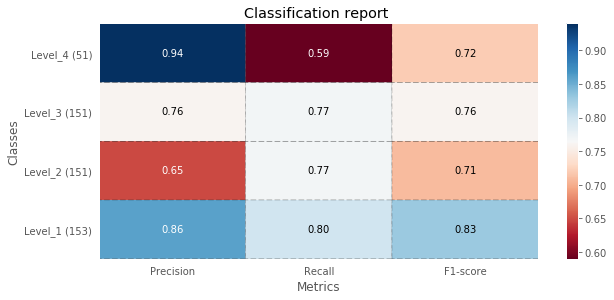

In [89]:
plot_classification_report(classification_report, title='Classification report ', cmap='RdBu')

Answer: TODO

## Question 8.  

+ After training your model with that `k`, 
+ use it to *predict* the class of a neighborhood with `RM = 2`, `PRATIO = 19`, and `LSTAT = 3.5`
+ If you are confused, check out the sklearn documentation for KNN

In [90]:
# TODO

#x_example = 
#print x 




x_example = {'RM': 2.0,'PRATIO':19.0,'LSTAT':3.5}
df = pd.DataFrame( [2,19,3.5], index = ['RM','PRATIO','RM']).T
df

,RM,PRATIO,RM
0,2.0,19.0,3.5


In [91]:
Best_Model.predict(df)

array(['Level_1'], dtype=object)

Answer: TODO